# <span style = "color:brown"> Handwritten Digits </span>

***

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating Deep Learning models.

It wraps the efficient numerical computation libaries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code.

In this project, you will discover how to create your first deep learning neural network model in Python using TensorFlow and Keras.

## Overview

The steps covered in this project are as follows:

1. Load Data
2. Data Preprocessing
3. Define Keras Model
4. Compile Model
5. Train the model
6. Evaluate the model
7. Make Predictions

## About the dataset

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

Your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images using neural networks

## Let us Begin

### Import necessary libraries

In [35]:
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'mnist.csv' dataset and store it in a DataFrame variable

In [36]:
data = pd.read_csv('mnist.csv')

### View the data

In [37]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### View the column names

In [38]:
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

### Check the shape of the data

In [39]:
data.shape

(42000, 785)

<b><i> Means that we have 42000 rows(images) and 785 columns </i></b>

### Split the data set into X and y variables (Input and target)

In [40]:
# Note that 'label' column in the dataset is our target

In [41]:
X = data.drop(columns = ['label'])
y = data['label']

### Check the shape of X and y

In [42]:
X.shape

(42000, 784)

In [43]:
y.shape

(42000,)

### Reshape X to (len(X),28,28,1)

In [44]:
X = X.values.reshape((len(X),28,28,1))

### Check the shape of X

In [45]:
X.shape

(42000, 28, 28, 1)

The shape of X is (42000, 28,28,1)
   * 42000 means that we have 42000 images
   * 28 means that our image size is 28x28 pixels

### Normalise the data by dividing it by 255

In [46]:
X = X/255

The pixel values can range from 0 to 256. Each number represents a color code.

When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex.

To reduce this we can normalize the values to range from 0 to 1.

In this way, the numbers will be small and the computation becomes easier and faster.

As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.

### Plot the first few digits

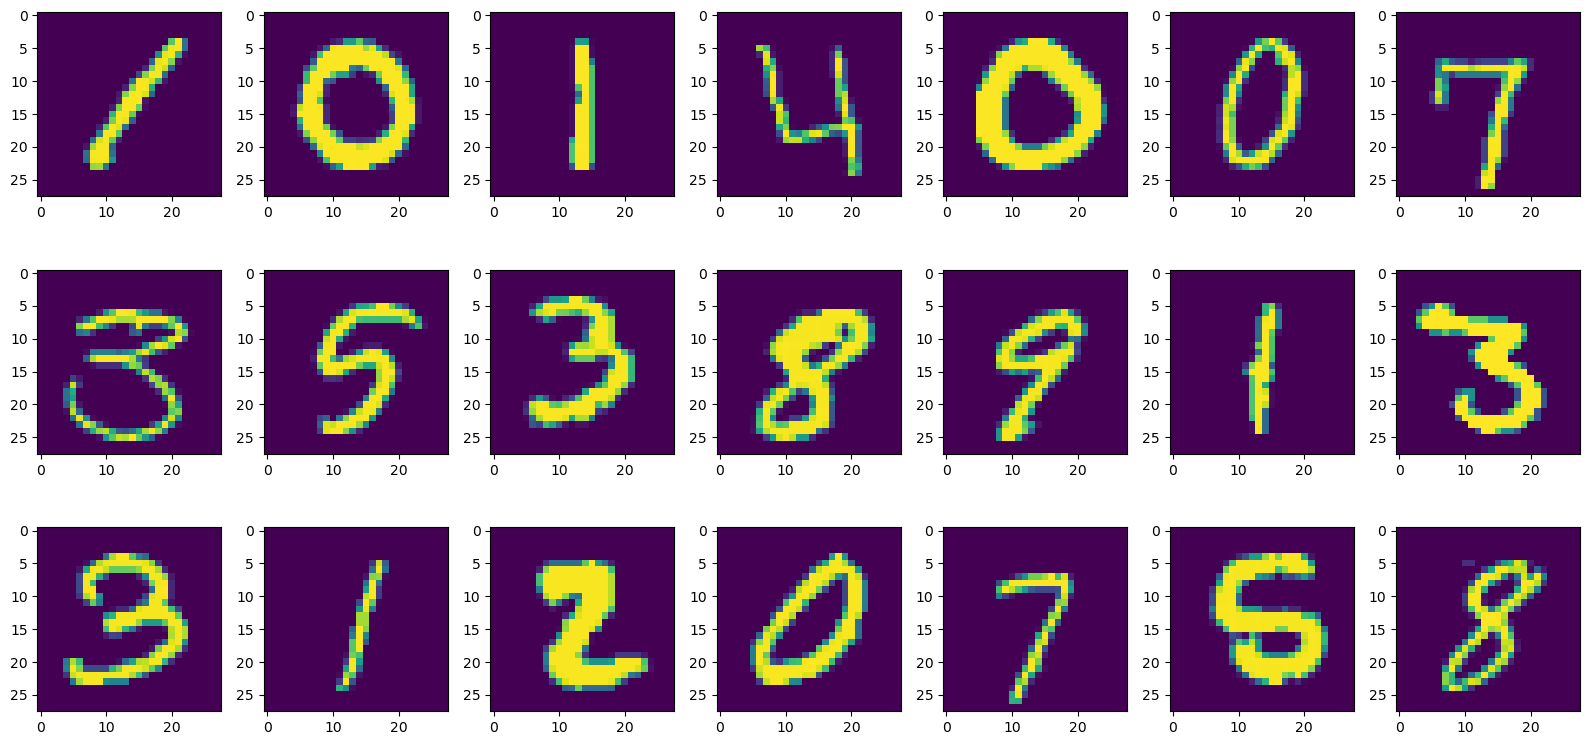

In [47]:
plt.figure(figsize = (16,8))
for i in range(21):
    plt.subplot(3,7,i+1)
    plt.imshow(X[i])
plt.tight_layout()

### Split the dataset into Training and Testing set

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

### Check the shape of X_train and X_test

In [49]:
X_train.shape

(33600, 28, 28, 1)

In [50]:
X_test.shape

(8400, 28, 28, 1)

## Create a Keras Sequential model

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layers has the right number of input features. This can be specified when creating the first layer with the <b>input_shape</b> argument.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the program.

In this Project, we will use a fully-connected network structure with 2 layers.

Fully connected layers are defined using the <b>Dense</b> class. We can specify the number of neurons or nodes in the first argument, and specify the activation function using the <b>activation</b> argument.

Use <b>Flatten</b> to reshape the array to such a shape which is equal to the number of elements present in the array. We have the output of a layer of shape(42000, 28,28,1), Flatten will unstack all the array values into a 1-D array with shape (42000*28*28*1)

We will use the Rectified linear unit activation function referred to as ReLU on the first layer and the Sigmoid function in the output layer.

It used to be case that sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure out network output is between 0 and 1 and easy to map to either a probability of class or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:
* Reshape the array to such a shape which is equal to the number of elements present in the array.
* The first layer has 100 nodes and uses the relu activation function.
* The output layer has 10 node and uses the sigmoid activation function(10 nodes is used here because we have 10 classification for handwritten digits)

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [55]:
model = Sequential([
                  layers.Flatten(input_shape = (28,28)),
                  layers.Dense(100, activation="relu"),
                  layers.Dense(10,activation="sigmoid")
])

C:\Users\smart\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile Keras Model

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers(the so-called backend) such as TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the <b>loss</b> funcition to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during the training. In this case, we will use 'sparse_categorical_crossentropy' as the loss argument. Use this crossentropy loss function when there are two or more label classes.

We will define the <b>optimizer</b> as the efficient stochastic gradient descent algorithm "<b>adam</b>".This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. 

Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the <b>metrics</b> argument.

In [56]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

### Check the summary of our model

In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

### Fit Keras Model

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train our model on our loaded data by calling the fit() function on the model.

Training occurs over <b>epochs</b> and each epoch is split into batches.

 * Epoch: One pass though all of the rows in the training dataset.
 * Batch: One or more samples considered by the model within an epoch weights are updated.It is selected with <b>batch_size</b> argument.
 
One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs.

<b>validation_split</b>: Fraction of the training data to be used as validation data.The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at end of each epoch.

In [58]:
model.fit(X_train,y_train, epochs = 5, validation_split=0.05, batch_size = 20)

Epoch 1/5
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8447 - loss: 0.5362 - val_accuracy: 0.9321 - val_loss: 0.2458
Epoch 2/5
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9530 - loss: 0.1594 - val_accuracy: 0.9476 - val_loss: 0.1746
Epoch 3/5
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9706 - loss: 0.1005 - val_accuracy: 0.9595 - val_loss: 0.1504
Epoch 4/5
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9769 - loss: 0.0767 - val_accuracy: 0.9649 - val_loss: 0.1312
Epoch 5/5
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9842 - loss: 0.0528 - val_accuracy: 0.9595 - val_loss: 0.1390


### Evaluate Keras Model

We have trained our nerual network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset(eg. train accuracy), but no idea of how well the algorithm might perform on new data.

You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pairs and collect scores, including average loss and any metrics you have configured, such as accuracy.

In [59]:
model.evaluate(X_train, y_train)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9845 - loss: 0.0478


[0.05138012766838074, 0.9836905002593994]

### Make predicitons using X_test and store it in a variable

Making predictions is as easy as calling the <b>predict</b> function on the model. We are using a sigmoid activation function on the output layer, so the predicitons will be a probability in the range between 0 and 1 for all classifications.

In [60]:
prediction = model.predict(X_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### View prediciton

In [61]:
prediction

array([[3.5009431e-04, 3.6466300e-02, 1.1682998e-01, ..., 1.7490453e-04,
        9.9969608e-01, 3.3890337e-04],
       [7.6666700e-05, 1.2522832e-03, 1.8968938e-03, ..., 9.1137773e-01,
        7.9277426e-01, 9.9359882e-01],
       [1.7550211e-04, 1.4027502e-05, 5.8351981e-04, ..., 1.7823981e-03,
        7.1890347e-02, 9.6887445e-01],
       ...,
       [1.3765831e-01, 4.0407391e-04, 1.8132976e-04, ..., 2.6140906e-04,
        5.0540483e-01, 9.7695701e-02],
       [9.9999583e-01, 1.3631328e-08, 3.8983540e-03, ..., 4.9110744e-03,
        9.9398101e-05, 7.7123439e-01],
       [1.5147180e-05, 6.0196896e-04, 1.9107360e-01, ..., 9.9999988e-01,
        2.8452364e-04, 9.2503113e-01]], dtype=float32)

##### Each element in the array consist of probalibily of each classification. We can check the maximum of each element with a numpy funciton called argmax()

### Check the first predicted value and plot the corresponding data

In [62]:
np.argmax(prediction[0])

8

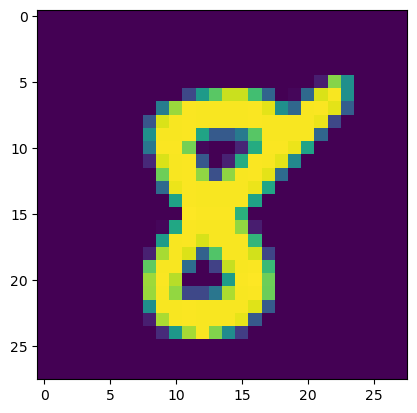

In [63]:
plt.imshow(X_test[0])

### Store all the predicted values as numbers in a list

##### Use list comprehension to achieve this task

In [64]:
predicted_values = [np.argmax(i) for i in prediction]

### Plot the accuracy of our prediction

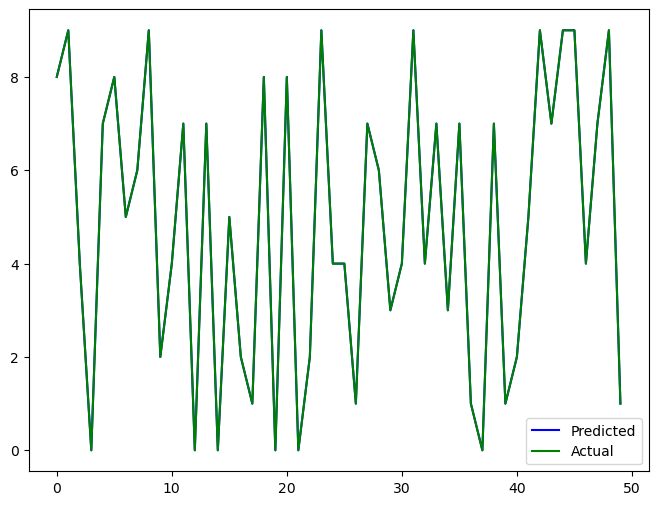

In [65]:
c = range(len(predicted_values))
plt.figure(figsize = (8,6))
plt.plot(c[:50], predicted_values[:50], color = 'blue')
plt.plot(c[:50], y_test[:50], color = 'green')
plt.legend(['Predicted', 'Actual'])
plt.show()

### Plot confusion matrix using heatmap

In [68]:
from sklearn import metrics

Text(70.72222222222221, 0.5, 'Actual Values')

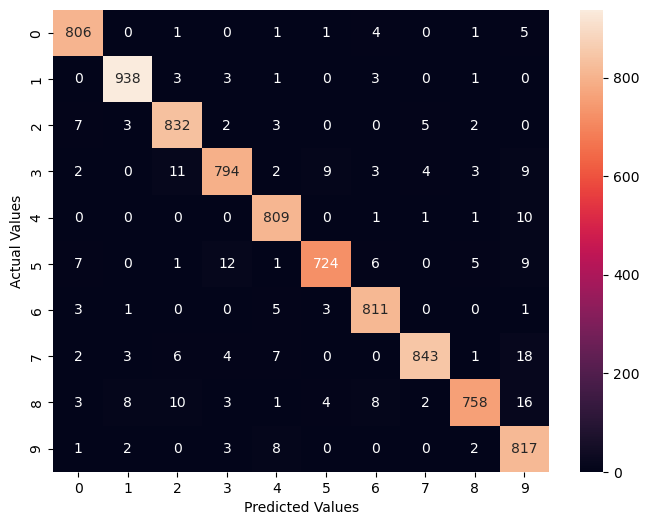

In [70]:
plt.figure(figsize = (8,6))
sns.heatmap(metrics.confusion_matrix(y_test,predicted_values), annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')